In [1]:
!mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [2]:
!kaggle competitions download -c jigsaw-toxic-comment-classification-challenge

Traceback (most recent call last):
  File "/opt/conda/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/opt/conda/lib/python3.10/site-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/opt/conda/lib/python3.10/site-packages/kaggle/api/kaggle_api_extended.py", line 403, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [3]:
!unzip /content/jigsaw-toxic-comment-classification-challenge.zip -d /content/data


unzip:  cannot find or open /content/jigsaw-toxic-comment-classification-challenge.zip, /content/jigsaw-toxic-comment-classification-challenge.zip.zip or /content/jigsaw-toxic-comment-classification-challenge.zip.ZIP.


In [4]:
!unzip /content/data/train.csv.zip   -d /content/data

unzip:  cannot find or open /content/data/train.csv.zip, /content/data/train.csv.zip.zip or /content/data/train.csv.zip.ZIP.


In [5]:
!unzip /kaggle/input/jigsaw-toxic-comment-classification-challenge/train.csv.zip

Archive:  /kaggle/input/jigsaw-toxic-comment-classification-challenge/train.csv.zip
  inflating: train.csv               


In [6]:
import csv
import pandas as pd

# Step 1: Read CSV file using the csv module
csv_file_path = "/kaggle/working/train.csv"

# Open the file using the csv module
with open(csv_file_path, 'r') as file:
    # Create a CSV reader
    csv_reader = csv.reader(file)

    # Read the header to get column names
    header = next(csv_reader)

    # Read the data
    data = [row for row in csv_reader]

# Step 2: Use pandas to create a DataFrame for analysis
df = pd.read_csv(csv_file_path)

# Display important details
print("CSV Header:", header)
print("Number of rows:", len(data))
print("Number of columns:", len(header))
print("Column names:", header)
print("Data types of columns:")
print(df.dtypes)
print("Summary statistics:")
print(df.describe())


CSV Header: ['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
Number of rows: 159571
Number of columns: 8
Column names: ['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
Data types of columns:
id               object
comment_text     object
toxic             int64
severe_toxic      int64
obscene           int64
threat            int64
insult            int64
identity_hate     int64
dtype: object
Summary statistics:
               toxic   severe_toxic        obscene         threat  \
count  159571.000000  159571.000000  159571.000000  159571.000000   
mean        0.095844       0.009996       0.052948       0.002996   
std         0.294379       0.099477       0.223931       0.054650   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%   

In [7]:
import pandas as pd


df = pd.read_csv(csv_file_path)

In [8]:
# Assuming your toxicity columns are 'toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate'
toxicity_columns = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

# Add the 'normal' column
df['normal'] = (df[toxicity_columns].sum(axis=1) == 0).astype(int)

# Print the updated DataFrame
print(df)

                      id                                       comment_text  \
0       0000997932d777bf  Explanation\nWhy the edits made under my usern...   
1       000103f0d9cfb60f  D'aww! He matches this background colour I'm s...   
2       000113f07ec002fd  Hey man, I'm really not trying to edit war. It...   
3       0001b41b1c6bb37e  "\nMore\nI can't make any real suggestions on ...   
4       0001d958c54c6e35  You, sir, are my hero. Any chance you remember...   
...                  ...                                                ...   
159566  ffe987279560d7ff  ":::::And for the second time of asking, when ...   
159567  ffea4adeee384e90  You should be ashamed of yourself \n\nThat is ...   
159568  ffee36eab5c267c9  Spitzer \n\nUmm, theres no actual article for ...   
159569  fff125370e4aaaf3  And it looks like it was actually you who put ...   
159570  fff46fc426af1f9a  "\nAnd ... I really don't think you understand...   

        toxic  severe_toxic  obscene  threat  insul

In [9]:
# Step 2: Print unique values for columns 3 to 8
for column in df.columns[2:9]:  # Assuming columns are 0-indexed
    unique_values = df[column].unique()
    print(f"Unique values for column {column}:")
    print(unique_values)
    print()


Unique values for column toxic:
[0 1]

Unique values for column severe_toxic:
[0 1]

Unique values for column obscene:
[0 1]

Unique values for column threat:
[0 1]

Unique values for column insult:
[0 1]

Unique values for column identity_hate:
[0 1]

Unique values for column normal:
[1 0]



In [10]:
import pandas as pd

# ... (your existing code)

# Assuming your DataFrame has a 'normal' column
# If not, you can add the 'normal' column as mentioned in the previous response

# Check the number of instances of 1 in each column
instances_of_1 = df.drop(columns=["id",'comment_text']).sum()

# Print the result
print("Number of instances of 1 in each column:")
print(instances_of_1)


Number of instances of 1 in each column:
toxic             15294
severe_toxic       1595
obscene            8449
threat              478
insult             7877
identity_hate      1405
normal           143346
dtype: int64


In [11]:
# Step 2: Make all words in a specific column lowercase
column_to_lower = 'comment_text'  # Replace with the actual column name
df[column_to_lower] = df[column_to_lower].str.lower()

# Print the DataFrame with the lowercase column
print(df)

                      id                                       comment_text  \
0       0000997932d777bf  explanation\nwhy the edits made under my usern...   
1       000103f0d9cfb60f  d'aww! he matches this background colour i'm s...   
2       000113f07ec002fd  hey man, i'm really not trying to edit war. it...   
3       0001b41b1c6bb37e  "\nmore\ni can't make any real suggestions on ...   
4       0001d958c54c6e35  you, sir, are my hero. any chance you remember...   
...                  ...                                                ...   
159566  ffe987279560d7ff  ":::::and for the second time of asking, when ...   
159567  ffea4adeee384e90  you should be ashamed of yourself \n\nthat is ...   
159568  ffee36eab5c267c9  spitzer \n\numm, theres no actual article for ...   
159569  fff125370e4aaaf3  and it looks like it was actually you who put ...   
159570  fff46fc426af1f9a  "\nand ... i really don't think you understand...   

        toxic  severe_toxic  obscene  threat  insul

In [12]:
# Load model directly
# from transformers import AutoTokenizer, AutoModelForMaskedLM
from transformers import AutoTokenizer, AutoModelForSequenceClassification, AdamW

tokenizer = AutoTokenizer.from_pretrained("GroNLP/hateBERT")


tokenizer_config.json:   0%|          | 0.00/151 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.24k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

In [13]:
from transformers import BertForSequenceClassification, AdamW
from torch.nn import BCEWithLogitsLoss
from torch.optim import Adam
import torch

from torch.utils.data import DataLoader, TensorDataset


def tokenize_and_pad(text, max_len=128):
    tokens = tokenizer.encode(text, max_length=max_len, truncation=True, padding='max_length')
    return tokens

# Example usage:
comments = df['comment_text'].tolist()
tokenized_comments = [tokenize_and_pad(comment) for comment in comments]

input_ids = torch.tensor(tokenized_comments)
attention_masks = (input_ids != 0).long()
labels = torch.tensor(df[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate', 'normal']].values)

dataset = TensorDataset(input_ids, attention_masks, labels)


In [14]:
from sklearn.model_selection import train_test_split

train_dataset, val_dataset = train_test_split(dataset, test_size=0.2, random_state=42)


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [15]:

model = AutoModelForSequenceClassification.from_pretrained("GroNLP/hateBERT" ,  num_labels = 7)
optimizer = AdamW(model.parameters(), lr=2e-5)

device = torch.device("cuda")

# Calculate class weights
class_weights = torch.tensor([len(train_dataset) / (7 * 15294),  # toxic
                              len(train_dataset) / (7 * 1595),   # severe_toxic
                              len(train_dataset) / (7 * 8449),   # obscene
                              len(train_dataset) / (7 * 478),    # threat
                              len(train_dataset) / (7 * 7877),   # insult
                              len(train_dataset) / (7 * 1405),   # identity_hate
                              len(train_dataset) / (7 * 143346)  # normal
                             ]).to(device)

# Use weighted BCEWithLogitsLoss
criterion = BCEWithLogitsLoss(weight=class_weights)


model.to(device)


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at GroNLP/hateBERT and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/opt/conda/lib/python3.10/site-packages/transformers/optimization.py:429: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12,

In [16]:
batch_size = 128
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, drop_last = True, pin_memory=True)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, drop_last = True, pin_memory=True)


In [17]:
from tqdm import tqdm  # Import tqdm for the progress bar
import matplotlib.pyplot as plt

# Lists to store loss and accuracy values
train_losses = []
val_losses = []
val_accuracies = []

num_epochs = 3

for epoch in range(num_epochs):
    model.train()

    # Create a tqdm progress bar for the training data
    train_iterator = tqdm(train_dataloader, desc=f'Epoch {epoch + 1}/{num_epochs}', dynamic_ncols=True)

    for batch in train_iterator:
        input_ids, attention_masks, labels = batch
        input_ids, attention_masks, labels = input_ids.to(device), attention_masks.to(device), labels.to(device)

        _, labels_indices = labels.max(dim=1)
        outputs = model(input_ids, attention_mask=attention_masks, labels=labels_indices)
        
        
#                        # Extract predicted probabilities
#         predicted_probs = torch.sigmoid(outputs.logits)

#         # Print the predicted probabilities for the first example in the batch
#         print("Predicted Probabilities:", predicted_probs[0].detach().cpu().numpy())

        loss = outputs.loss
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Update the tqdm progress bar
        train_iterator.set_postfix(loss=loss.item())

    # Validation
    model.eval()
    val_loss = 0
    correct_predictions = 0
    total_samples = 0
    
    # Create a tqdm progress bar for the validation data
    val_iterator = tqdm(val_dataloader, desc='Validation', dynamic_ncols=True)

    with torch.no_grad():
        for batch in val_iterator:
            input_ids, attention_masks, labels = batch
            input_ids, attention_masks, labels = input_ids.to(device), attention_masks.to(device), labels.to(device)

            _, labels_indices = labels.max(dim=1)
            outputs = model(input_ids, attention_mask=attention_masks, labels=labels_indices)
            val_loss += outputs.loss.item()
            _, predicted_indices = outputs.logits.max(dim=1)
            correct_predictions += (predicted_indices == labels_indices).sum().item()
            total_samples += labels.size(0)

            # Update the tqdm progress bar
            val_iterator.set_postfix(val_loss=val_loss / len(val_iterator))
            
     # Calculate accuracy
    accuracy = correct_predictions / total_samples

    # Append values to lists
    train_losses.append(loss.item())
    val_losses.append(val_loss / len(val_dataloader))
    val_accuracies.append(accuracy)

    print(f'Epoch {epoch + 1}/{num_epochs}, Validation Loss: {val_loss / len(val_dataloader)}, Accuracy: {accuracy}')
    




Validation: 100%|██████████| 249/249 [01:56<00:00,  2.14it/s, val_loss=0.107]


Epoch 1/3, Validation Loss: 0.10679589702661736, Accuracy: 0.9641378012048193


Validation: 100%|██████████| 249/249 [01:56<00:00,  2.14it/s, val_loss=0.101]


Epoch 2/3, Validation Loss: 0.10138908724289343, Accuracy: 0.9662713353413654


Validation: 100%|██████████| 249/249 [01:56<00:00,  2.14it/s, val_loss=0.12]

Epoch 3/3, Validation Loss: 0.12020704556391182, Accuracy: 0.9633534136546185


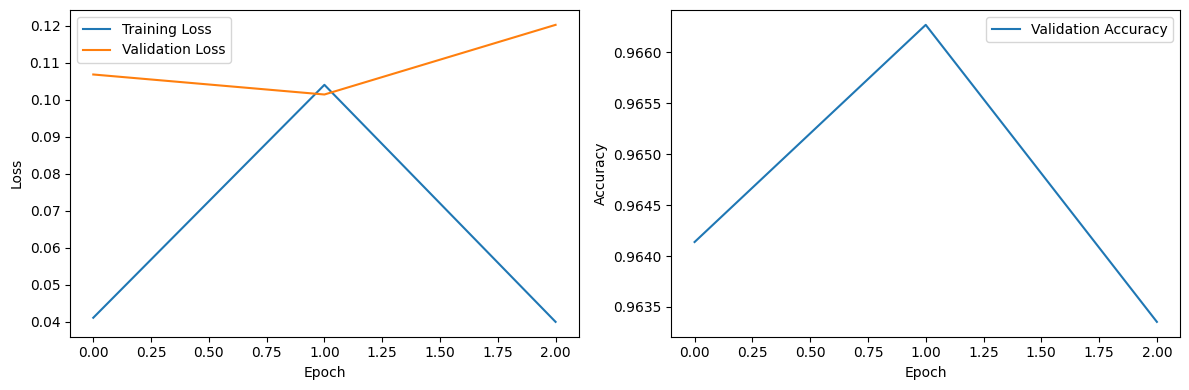

In [18]:
# Plotting the loss and accuracy graph
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(val_accuracies, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [19]:
checkpoint_path = '/kaggle/working/final_model_checkpoint.pth'
final_checkpoint = {
    'epoch': num_epochs,
    'model_state_dict': model.state_dict(),
    'optimizer_state_dict': optimizer.state_dict(),
    'val_loss': val_loss / len(val_dataloader),
}
torch.save(final_checkpoint, checkpoint_path)
print(f"Final model checkpoint saved at '{checkpoint_path}'")

Final model checkpoint saved at '/kaggle/working/final_model_checkpoint.pth'


In [20]:
model.eval()
val_loss = 0
correct_predictions = 0
total_samples = 0

# Create a tqdm progress bar for the validation data
val_iterator = tqdm(val_dataloader, desc='Validation', dynamic_ncols=True)

# Counter for printing every 50 items
print_counter = 0

with torch.no_grad():
    for batch in val_iterator:
        input_ids, attention_masks, labels = batch
        input_ids, attention_masks, labels = input_ids.to(device), attention_masks.to(device), labels.to(device)

        _, labels_indices = labels.max(dim=1)
        outputs = model(input_ids, attention_mask=attention_masks, labels=labels_indices)

        val_loss += outputs.loss.item()
        _, predicted_indices = outputs.logits.max(dim=1)
        correct_predictions += (predicted_indices == labels_indices).sum().item()
        total_samples += labels.size(0)

        predicted_probs = torch.sigmoid(outputs.logits)

        # Update the counter
        print_counter += 1

        # Check if it's time to print
        if print_counter % 50 == 0:
            # Print the predicted probabilities for the first example in the batch
            print("Predicted Probabilities:", predicted_probs[0].detach().cpu().numpy())

            predicted_probabilities = predicted_probs[0].detach().cpu().numpy()
            # Calculate the regression value
            regression_value = 1 - predicted_probabilities[6]

            # Print the result
            print("Regression Value:", regression_value)

        # Update the tqdm progress bar
        val_iterator.set_postfix(val_loss=val_loss / len(val_iterator))

# Calculate accuracy
accuracy = correct_predictions / total_samples

print("Validation Accuracy:", accuracy)


Validation:  20%|██        | 50/249 [00:23<01:33,  2.13it/s, val_loss=0.0248]

Predicted Probabilities: [0.6942963  0.03636036 0.23472726 0.05787715 0.20862272 0.11467873
 0.999065  ]
Regression Value: 0.0009350180625915527


Validation:  40%|████      | 100/249 [00:46<01:09,  2.14it/s, val_loss=0.0491]

Predicted Probabilities: [0.35636863 0.06083775 0.24183746 0.08663315 0.15402341 0.14860965
 0.99970347]
Regression Value: 0.00029653310775756836


Validation:  60%|██████    | 150/249 [01:10<00:46,  2.13it/s, val_loss=0.0719]

Predicted Probabilities: [0.3341718  0.05990013 0.19655287 0.08819608 0.1323284  0.13423088
 0.999749  ]
Regression Value: 0.0002509951591491699


Validation:  80%|████████  | 200/249 [01:33<00:22,  2.14it/s, val_loss=0.0945]

Predicted Probabilities: [0.39549863 0.05409877 0.23908123 0.08687111 0.14551224 0.11979125
 0.9996455 ]
Regression Value: 0.00035452842712402344


Validation: 100%|██████████| 249/249 [01:56<00:00,  2.14it/s, val_loss=0.12]

Validation Accuracy: 0.9633534136546185


In [21]:
df2 = pd.read_csv("/kaggle/input/jigsaw-toxic-severity-rating/validation_data.csv")

In [22]:
df2

,worker,less_toxic,more_toxic
0,313,This article sucks \n\nwoo woo wooooooo,WHAT!!!!!!!!?!?!!?!?!!?!?!?!?!!!!!!!!!!!!!!!!!...
1,188,"""And yes, people should recognize that but the...",Daphne Guinness \n\nTop of the mornin' my fav...
2,82,"Western Media?\n\nYup, because every crime in...","""Atom you don't believe actual photos of mastu..."
3,347,And you removed it! You numbskull! I don't car...,You seem to have sand in your vagina.\n\nMight...
4,539,smelly vagina \n\nBluerasberry why don't you ...,"hey \n\nway to support nazis, you racist"
...,...,...,...
30103,461,I'm sorry. I'm not an admin. I will give you t...,get out my large penis
30104,527,I'm sorry. I'm not an admin. I will give you t...,get out my large penis
30105,352,"wow...\nare you out of your mind, how was my e...",Piss off you slant eyed-gook
30106,311,"wow...\nare you out of your mind, how was my e...",Piss off you slant eyed-gook


In [23]:
import torch
from transformers import BertForSequenceClassification, AdamW
from torch.nn import BCEWithLogitsLoss
from torch.optim import Adam
import torch

from torch.utils.data import DataLoader, TensorDataset
def tokenize_and_pad(text, max_len=128):
    tokens = tokenizer.encode(text, max_length=max_len, truncation=True, padding='max_length')
    return tokens

In [24]:
# Example usage:
less_toxic_comments = df2['less_toxic'].tolist()
tokenized_less_toxic_comments = [tokenize_and_pad(comment) for comment in less_toxic_comments]


input_ids = torch.tensor(tokenized_less_toxic_comments)
attention_masks = (input_ids != 0).long()


test_dataset = TensorDataset(
    input_ids,
    attention_masks
)

In [25]:
batch_size = 64
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, drop_last = True, pin_memory=True)
device = torch.device("cuda")

In [26]:
# Create a tqdm progress bar for the DataLoader batches
from tqdm import tqdm
batch_num = 0

model.eval()
with torch.no_grad():
        for batch in tqdm(test_dataloader, desc='Calculating Scores', dynamic_ncols=True):
            input_ids, attention_masks = batch
            input_ids, attention_masks = input_ids.to(device), attention_masks.to(device)


            # Now you can use the input_ids and attention_masks as needed in your model
            outputs = model(input_ids, attention_mask=attention_masks)

            predicted_probs = torch.sigmoid(outputs.logits)

            # Iterate over the batch to get individual sample predictions and update the DataFrame
           
            for i in range(batch_size):
                index = batch_size * batch_num + i  # Calculate the original index of the sample
                regression_value = 1 - predicted_probs[i].detach().cpu().numpy()[6]
#                 print(f"Regression value of{index}: {regression_value}")

                # Assign the calculated regression value to the new column 'less_toxic_score'
                df2.at[index, 'less_toxic_score'] = regression_value

            batch_num += 1

# Print the updated DataFrame
print(df2)

Calculating Scores: 100%|██████████| 470/470 [01:52<00:00,  4.18it/s]

       worker                                         less_toxic  \
0         313            This article sucks \n\nwoo woo wooooooo   
1         188  "And yes, people should recognize that but the...   
2          82   Western Media?\n\nYup, because every crime in...   
3         347  And you removed it! You numbskull! I don't car...   
4         539   smelly vagina \n\nBluerasberry why don't you ...   
...       ...                                                ...   
30103     461  I'm sorry. I'm not an admin. I will give you t...   
30104     527  I'm sorry. I'm not an admin. I will give you t...   
30105     352  wow...\nare you out of your mind, how was my e...   
30106     311  wow...\nare you out of your mind, how was my e...   
30107      54  wow...\nare you out of your mind, how was my e...   

                                              more_toxic  less_toxic_score  
0      WHAT!!!!!!!!?!?!!?!?!!?!?!?!?!!!!!!!!!!!!!!!!!...          0.704471  
1       Daphne Guinness \n\nT

In [27]:
import pandas as pd

# Assuming df2 is your DataFrame
nan_count = df2["less_toxic_score"].isna().sum()

# Alternatively, you can use isnull() instead of isna()
# nan_count = df2["less_toxic_score"].isnull().sum()

print("Number of NaN values in 'less_toxic_score' column:", nan_count)


Number of NaN values in 'less_toxic_score' column: 28


In [28]:
# Example usage:
more_toxic_comments = df2['more_toxic'].tolist()
tokenized_more_toxic_comments = [tokenize_and_pad(comment) for comment in more_toxic_comments]


input_ids = torch.tensor(tokenized_more_toxic_comments)
attention_masks = (input_ids != 0).long()


test_dataset = TensorDataset(
    input_ids,
    attention_masks
)

In [29]:
batch_size = 64
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, drop_last = True, pin_memory=True)
device = torch.device("cuda")

In [30]:
# Create a tqdm progress bar for the DataLoader batches
from tqdm import tqdm
batch_num = 0

model.eval()
with torch.no_grad():
        for batch in tqdm(test_dataloader, desc='Calculating Scores', dynamic_ncols=True):
            input_ids, attention_masks = batch
            input_ids, attention_masks = input_ids.to(device), attention_masks.to(device)


            # Now you can use the input_ids and attention_masks as needed in your model
            outputs = model(input_ids, attention_mask=attention_masks)

            predicted_probs = torch.sigmoid(outputs.logits)

            # Iterate over the batch to get individual sample predictions and update the DataFrame
           
            for i in range(batch_size):
                index = batch_size * batch_num + i  # Calculate the original index of the sample
                regression_value = 1 - predicted_probs[i].detach().cpu().numpy()[6]
#                 print(f"Regression value of{index}: {regression_value}")

                # Assign the calculated regression value to the new column 'less_toxic_score'
                df2.at[index, 'more_toxic_score'] = regression_value

            batch_num += 1

# Print the updated DataFrame
print(df2)

Calculating Scores: 100%|██████████| 470/470 [01:52<00:00,  4.18it/s]

       worker                                         less_toxic  \
0         313            This article sucks \n\nwoo woo wooooooo   
1         188  "And yes, people should recognize that but the...   
2          82   Western Media?\n\nYup, because every crime in...   
3         347  And you removed it! You numbskull! I don't car...   
4         539   smelly vagina \n\nBluerasberry why don't you ...   
...       ...                                                ...   
30103     461  I'm sorry. I'm not an admin. I will give you t...   
30104     527  I'm sorry. I'm not an admin. I will give you t...   
30105     352  wow...\nare you out of your mind, how was my e...   
30106     311  wow...\nare you out of your mind, how was my e...   
30107      54  wow...\nare you out of your mind, how was my e...   

                                              more_toxic  less_toxic_score  \
0      WHAT!!!!!!!!?!?!!?!?!!?!?!?!?!!!!!!!!!!!!!!!!!...          0.704471   
1       Daphne Guinness \n\

In [31]:
# Drop rows with NaN values
df2 = df2.dropna()

# Now df2 contains only rows without NaN values
print(df2)

       worker                                         less_toxic  \
0         313            This article sucks \n\nwoo woo wooooooo   
1         188  "And yes, people should recognize that but the...   
2          82   Western Media?\n\nYup, because every crime in...   
3         347  And you removed it! You numbskull! I don't car...   
4         539   smelly vagina \n\nBluerasberry why don't you ...   
...       ...                                                ...   
30075     584       Some person posted a picture of horse feces.   
30076     110  "\nSorry, really not interested in your opinio...   
30077     486          REDIRECT User talk:Buckner 1986\More Crap   
30078      22  "\n\nOH, OH, NICE ONE, REVERTING MY EDITS! CHR...   
30079     296  "\nHeh. I don't really care. I've made some go...   

                                              more_toxic  less_toxic_score  \
0      WHAT!!!!!!!!?!?!!?!?!!?!?!?!?!!!!!!!!!!!!!!!!!...          0.704471   
1       Daphne Guinness \n\

In [32]:
# Compare values and create a new column 'Column2_greater_than_Column1'
df2['correct_classification'] = df2['more_toxic_score'] > df2['less_toxic_score']

# Calculate the number of times Column 2 has a greater value than Column 1
count_greater = df2['correct_classification'].sum()

print(f"Accuracy: {(count_greater/len(df2)*100)}")


Accuracy: 68.85970744680851


/tmp/ipykernel_26/1679018880.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['correct_classification'] = df2['more_toxic_score'] > df2['less_toxic_score']
